# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from pprint import pprint

# Output File (CSV)
output_data_file = "data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

582

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
baseURL = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial"

print("Beginning Data Retrieval")
print('-'*60)
num = 1
num_set = 1

city_name, cloud, country, date, humid, lat, lon, temp_max, wind_speed = ([] for i in range(9))
        
for city in cities:
    url = f"{baseURL}&q={city}"
    response = requests.get(url)

    if response.ok:
        r = response.json()
        print(f"Processing Record {num} of Set {num_set} | {city}")
        num += 1
        
        city_name.append(r['name'])
        cloud.append(r['clouds']['all'])
        country.append(r['sys']['country'])
        date.append(r['dt'])
        humid.append(r['main']['humidity'])
        lat.append(r['coord']['lat'])
        lon.append(r['coord']['lon'])
        temp_max.append(r['main']['temp_max'])
        wind_speed.append(r['wind']['speed'])
        
        if num == 51:
            num = 1
            num_set += 1
    else:
        print("City not found. Skipping...")
        
print('-'*60)    
print("Data Retrieval Complete")
print('-'*60)

# Print Log Open below!

Beginning Data Retrieval
------------------------------------------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | naze
Processing Record 3 of Set 1 | marsaxlokk
Processing Record 4 of Set 1 | camocim
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | kloulklubed
City not found. Skipping...
Processing Record 7 of Set 1 | srednekolymsk
Processing Record 8 of Set 1 | codrington
Processing Record 9 of Set 1 | lompoc
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | waterloo
Processing Record 12 of Set 1 | nantucket
Processing Record 13 of Set 1 | san juan
Processing Record 14 of Set 1 | rawson
Processing Record 15 of Set 1 | tolaga bay
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | guerande
Processing Record 19 of Set 1 | goranboy
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | methoni
Processing Record 22 of Set 1 | alta 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
data_set = [city_name, cloud, country, date, humid, lat, lon, temp_max, wind_speed]
df = pd.DataFrame(data_set).T.set_axis(['City','Cloudiness','Country','Date','Humidity',
                                        'Lat','Lng','Max Temp','Wind Speed'], axis=1, inplace=False)
df_count = df.count()
df_count

City          529
Cloudiness    529
Country       529
Date          529
Humidity      529
Lat           529
Lng           529
Max Temp      529
Wind Speed    529
dtype: int64

In [5]:
df_head = df.head()
df["Date"] = time.strftime('%Y/%m/%d', time.localtime(df["Date"][0]))
data_export = df.to_csv(output_data_file)
df_head

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,75,AR,2019/10/22,79,-54.81,-68.31,57.2,13.87
1,Naze,75,NG,2019/10/22,94,5.43,7.07,78.8,5.23
2,Marsaxlokk,20,MT,2019/10/22,73,35.84,14.54,71.6,11.41
3,Camocim,29,BR,2019/10/22,54,-2.9,-40.84,86.54,13.87
4,Mataura,68,NZ,2019/10/22,80,-46.19,168.86,43,7


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

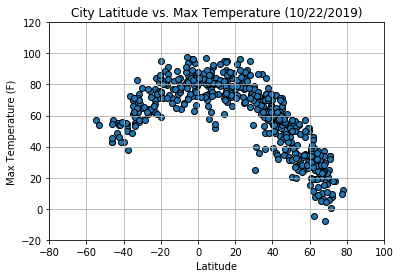

In [68]:
plt.scatter(df['Lat'],df['Max Temp'],edgecolors='k')
plt.title('City Latitude vs. Max Temperature (10/22/2019)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.grid()

plt.savefig('image/01_Lat_vs_MaxTemp.png')

plt.show()

#### Latitude vs. Humidity Plot

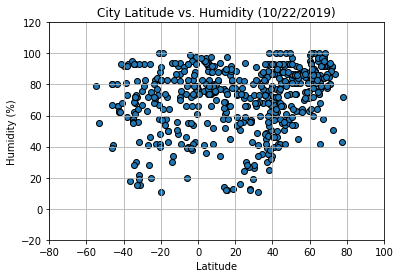

In [69]:
plt.scatter(df['Lat'],df['Humidity'],edgecolors='k')
plt.title('City Latitude vs. Humidity (10/22/2019)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.grid()

plt.savefig('image/02_Lat_vs_Humid.png')

plt.show()

#### Latitude vs. Cloudiness Plot

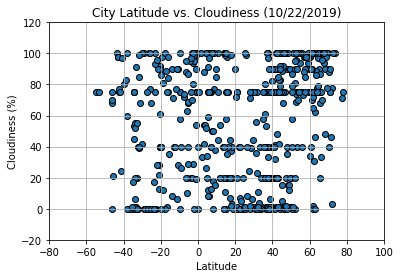

In [70]:
plt.scatter(df['Lat'],df['Cloudiness'],edgecolors='k')
plt.title('City Latitude vs. Cloudiness (10/22/2019)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.grid()

plt.savefig('image/03_Lat_vs_Cloud.png')

plt.show()

#### Latitude vs. Wind Speed Plot

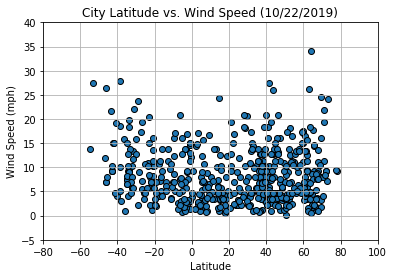

In [71]:
plt.scatter(df['Lat'],df['Wind Speed'],edgecolors='k')
plt.title('City Latitude vs. Wind Speed (10/22/2019)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylim(-5,40)
plt.xlim(-80,100)
plt.grid()

plt.savefig('image/04_Lat_vs_Wind.png')

plt.show()

# Data Analysis

1. Cities Latitude vs. Temperature Plot shows that as latitude approaches to equator (x = 0) from north pole (0 < x < 100) and south pole (-80 < x < 0) respectively, there is a definite and firm increase in temperature heading towards the equator. This plot alone depicts possible assumption that temperature is higher for the cities on or near the equator. 

2. Latitude vs. Humidity Plot does not show clear correlation between latitude and humidity towards the equator. However, in this particular set of randomly selected cities, plotted data show that northern latitude positioned cities tend to have more humidity percentages as compared to south of the equator.

3. Latitude vs. Cloudiness Plot does not show any relationship to equator, matter in fact, any noticeable trend at all. Cloudiness percentage is evenly spread throughout the latitudes in various percentages. There must some other factor that controls cloudiness in the cities rather than latitude position.

4. Latitude vs. Wind Speed Plot does not seem to show relationship towards the equator. However, it is still observable that regarless of the latitude position, wind speed is very low in most cities and the number of cities falls as wind speed increases. It is possible to assume there is some other factor that relates to wind speed in the cities.